In [1]:
########################################################
######### WALK THROUGH EXAMPLE OF USING RNN_1 #########
######################################################

In [2]:
#######################################################
########## PREDICT GOOGLE STOCK PRICE TREND ##########

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Importing the training set #
dataset_train = pd.read_csv("/Users/ahsan/Dropbox/My Mac (Alnoors-MBP-2.hub)/Documents/github/Deep_Learning/RNN_DATA/Google_Stock_Price_Train.csv")

In [25]:
# We want the open stock price
#  Convert data into numpy array as Keras requirement
training_set = np.array(dataset_train.iloc[:, 1:2].values)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
########################################################################
###################### DATA PREPROCESSING #############################
######################################################################

In [34]:
# Feature Scaling as Required by Keras
# An instance of MinMax Normalizer
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [37]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [49]:
# Reshaping the Data. Keras RNN expects a 3D np array
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [52]:
#################################################################################
################################ BUILDING THE RNN ###############################
#################################################################################

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [55]:
# Initialising
regressor = Sequential()

In [56]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [57]:
# Adding the Second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the Third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [58]:
# Making the last layer - The output layer
regressor.add(Dense(units=1))

In [59]:
# Compiling the RNN
regressor.compile(optimizer='adam', loss='mse')

In [60]:
########################################################################
###################### TRAINING AND FITTING #############################
######################################################################

In [61]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0322
Epoch 2/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0075
Epoch 3/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0042
Epoch 13/100


38/38 [==============================] - 5s 138ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0014


In [62]:
# Making the prediction and visualising the results
# Importing the Test set #
dataset_test = pd.read_csv("/Users/ahsan/Dropbox/My Mac (Alnoors-MBP-2.hub)/Documents/github/Deep_Learning/RNN_DATA/Google_Stock_Price_Test.csv")

In [63]:
# We want the open stock price
#  Convert data into numpy array as Keras requirement
real_stock_price = np.array(dataset_test.iloc[:, 1:2].values)

In [88]:
# Making the data as per keras requirements
dataset_total = pd.concat([dataset_train["Open"], dataset_test["Open"]], axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [97]:
# Creating a data structure with 60 timesteps and 1 output
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [99]:
# Reshaping the Data. Keras RNN expects a 3D np array
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [101]:
predicted_stock_price = regressor.predict(X_test)

In [104]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [105]:
predicted_stock_price

array([[785.0747 ],
       [782.3647 ],
       [782.7238 ],
       [783.79156],
       [786.75793],
       [792.2864 ],
       [797.212  ],
       [799.1865 ],
       [799.8877 ],
       [800.2372 ],
       [800.4707 ],
       [800.4684 ],
       [800.40015],
       [800.98193],
       [801.87494],
       [806.52686],
       [813.0878 ],
       [820.00134],
       [823.6125 ],
       [819.4819 ]], dtype=float32)

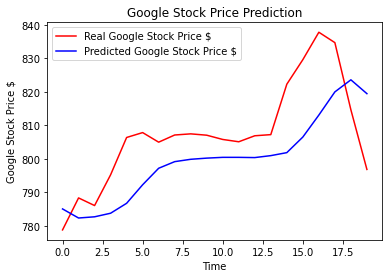

In [110]:
# Visualising the Results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price $')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price $')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price $')
plt.legend()